In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

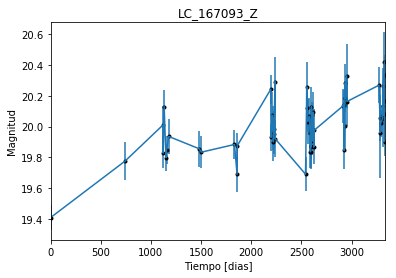

In [2]:
data = np.genfromtxt('LC_167093_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_167093_Z')
plt.savefig("LC_167093_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

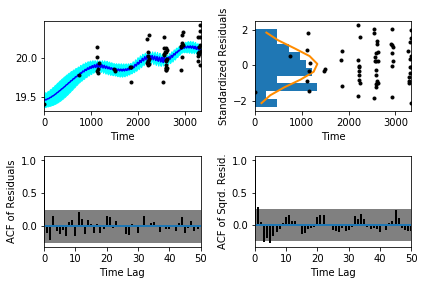

In [5]:
sample.assess_fit()

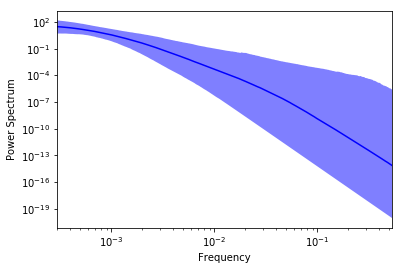

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

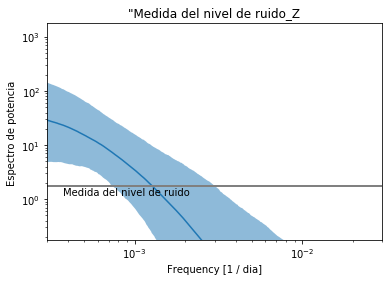

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_167093_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_167093_Z')

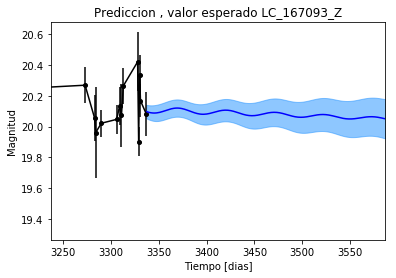

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_167093_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_167093_Z')

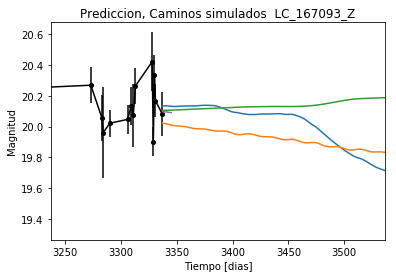

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_167093_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


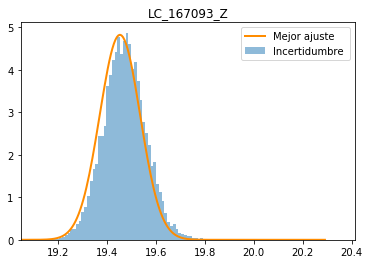

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_167093_Z')
plt.savefig("Mejor_ajuste_LC_167093_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_167093_Z')

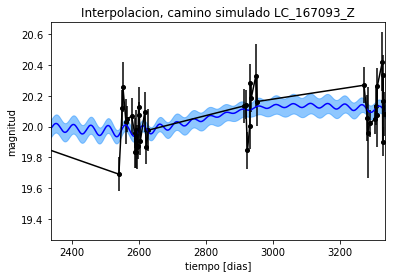

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_167093_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_167093_Z')

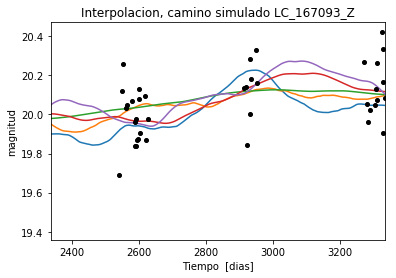

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_167093_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 332.511268617
Median: 0.00779255948318
Standard deviation: 0.219233576872
68% credibility interval: [ 0.00060018  0.17472636]
95% credibility interval: [  3.25202687e-04   8.60913043e-01]
99% credibility interval: [  3.03079115e-04   1.00531971e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 670.294738909
Median: 0.000852801607672
Standard deviation: 0.0597558240256
68% credibility interval: [ 0.00037191  0.00976413]
95% credibility interval: [ 0.00030936  0.13036335]
99% credibility interval: [  3.01146857e-04   4.21970612e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1484.21144739
Median: 0.0116977507974
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1128.36758508
Median: 55.4180079713
Standard deviation: 1.67752861046
68% credibility interval: [ 53.50872849  56.7024557 ]
95% credibility interval: [ 51.08663598  57.39785126]
99% credibility interval: [ 49.02469655  57.65962851]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2893.74692881
Median: 0.545861058557
Standard deviation: 2.12353716433
68% credibility interval: [ 0.0479518   3.90167297]
95% credibility interval: [ 0.01077107  6.76352426]
99% credibility interval: [  9.09824547e-03   9.83293922e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 931.02176728
Median: 0.0934188377299
Standard deviation: 6.41129278781
68% credibility interval: [ 0.00419985  2.961197  ]
95% credibility interval: [  2.5

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 1.9845465302e-44
Standard deviation: 6.25010885606e+41
68% credibility interval: [  2.74008570e-100   1.07673401e-021]
95% credibility interval: [  1.15177667e-128   2.44013895e+000]
99% credibility interval: [  1.04993787e-132   9.63266348e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1539.99141694
Median: 19.8698441971
Standard deviation: 0.135003548699
68% credibility interval: [ 19.74955268  19.97397444]
95% credibility interval: [ 19.590133    20.13153369]
99% credibility interval: [ 19.36385497  20.29720069]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 708.753026702
Median: 0.000302738893445
Standard deviation: 0.184562906804
68% credibility interval: [ 0.          0.12799985]
95% credibility interval: [ 0.          0.70035548]
99% credibility interval: [ 0.          0.96088378]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 708.753026702
Median: 0.000302738893445
Standard deviation: 0.184562906804
68% credibility interval: [ 0.          0.12799985]
95% credibility interval: [ 0.          0.70035548]
99% credibility interval: [ 0.          0.96088378]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 10082.9977034
Median: 0.0
Standard deviation: 0.0013946678206
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1128.36758508
Median: 55.4180079713
Standard deviation: 1.67752861046
68% credibility interval: [ 53.50872849  56.7024557 ]
95% credibility interval: [ 51.08663598  57.39785126]
99% credibility interval: [ 49.02469655  57.65962851]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 933.76306882
Median: 0.0486271135363
Standard deviation: 0.0645469002581
68% credibility interval: [ 0.02614254  0.09621826]
95% credibility interval: [ 0.0154547   0.21041176]
99% credibility interval: [ 0.01057802  0.44812889]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2409.53056148
Median: 1.17662985288
Standard deviation: 0.172041346025
68% credibility interval: [ 1.02308574  1.36394247]
95% credibility interval: [ 0.89689816  1.56856069]
99% credibility interval: [ 0.8238885  1.7250033]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1203.42135325
Median: 1.15772658236e-05
Standard deviation: 0.12990238362
68% credibility interval: [  3.04619614e-07   9.22007867e-04]
95% credibility interval: [  9.79226573e-09   1.51287640e-01]
99% credibility interval: [  9.13716442e-10   8.94701533e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 332.511268617
Median: (-0.04896209525-1.1584097005j)
Standard deviation: 1.80062133839
68% credibility interval: [-1.09783813+0.j         -0.00377104-0.05208224j]
95% credibility interval: [ -5.40927618e+00+0.j          -2.04330875e-03-0.00236189j]
99% credibility interval: [ -6.31661002e+00+0.j          -1.90430224e-03-0.00349717j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 670.294738909
Median: (-0.00535831053126+0.0578706861043j)
Standard deviation: 1.21890920648
68% credibility interval: [-0.06134983+0.j -0.00233677+0.j]
95% credibility interval: [-0.81909708 +4.07034476e+00j -0.00194378 +5.60046866e-05j]
99% credibility interval: [ -2.65131955e+00+6.60746254j  -1.89216151e-03+0.j        ]
Posterior summary fo